In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'C:\Users\Vinay\Documents\Refactored_Py_DS_ML_Bootcamp-master\TensorFlow_FILES\DATA\cancer_classification.csv')

In [3]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [6]:
sns.countplot(x = 'benign_0__mal_1', data= df)

NameError: name 'sns' is not defined

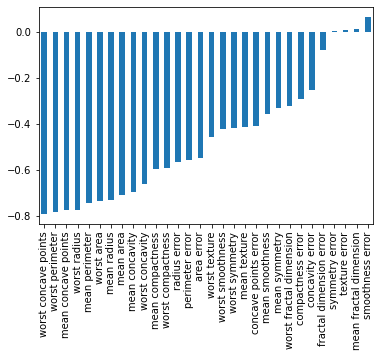

In [8]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind = 'bar')

In [9]:
X = df.drop('benign_0__mal_1', axis=1).values

In [10]:
y = df['benign_0__mal_1'].values

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
scaler = MinMaxScaler()

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [15]:
X_train = scaler.fit_transform(X_train)

In [16]:
X_test = scaler.transform(X_test)

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [18]:
X_train.shape

(426, 30)

In [19]:
model = Sequential()

model.add(Dense(30, activation="relu"))

model.add(Dense(15, activation="relu"))

#Binary Classification
model.add(Dense(1, activation= 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [20]:
model.fit(x= X_train, y = y_train, epochs = 600, validation_data = (X_test, y_test))

Train on 426 samples, validate on 143 samples
Epoch 1/600
 32/426 [=>............................] - ETA: 42s

InternalError:  Blas GEMM launch failed : a.shape=(32, 30), b.shape=(30, 30), m=32, n=30, k=30
	 [[node sequential/dense/MatMul (defined at <ipython-input-20-c04790621ab6>:1) ]] [Op:__inference_distributed_function_786]

Function call stack:
distributed_function


In [19]:
model.fit(x= X_train, y = y_train, epochs = 600, validation_data = (X_test, y_test))

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 14s 33ms/sample - loss: 0.7214 - val_loss: 0.6761
Epoch 2/600
426/426 [==============================] - 0s 274us/sample - loss: 0.6622 - val_loss: 0.6401
Epoch 3/600
426/426 [==============================] - 0s 216us/sample - loss: 0.6274 - val_loss: 0.6087
Epoch 4/600
426/426 [==============================] - 0s 214us/sample - loss: 0.5915 - val_loss: 0.5720
Epoch 5/600
426/426 [==============================] - 0s 218us/sample - loss: 0.5547 - val_loss: 0.5333
Epoch 6/600
426/426 [==============================] - 0s 223us/sample - loss: 0.5168 - val_loss: 0.4925
Epoch 7/600
426/426 [==============================] - 0s 225us/sample - loss: 0.4731 - val_loss: 0.4463
Epoch 8/600
426/426 [==============================] - 0s 203us/sample - loss: 0.4338 - val_loss: 0.4048
Epoch 9/600
426/426 [==============================] - 0s 213us/sample - loss: 0.3917 - val_loss: 0.3627
Epoch 10/

Epoch 78/600
426/426 [==============================] - 0s 228us/sample - loss: 0.0567 - val_loss: 0.1189
Epoch 79/600
426/426 [==============================] - 0s 214us/sample - loss: 0.0544 - val_loss: 0.1217
Epoch 80/600
426/426 [==============================] - 0s 214us/sample - loss: 0.0540 - val_loss: 0.1191
Epoch 81/600
426/426 [==============================] - 0s 312us/sample - loss: 0.0529 - val_loss: 0.1192
Epoch 82/600
426/426 [==============================] - 0s 277us/sample - loss: 0.0518 - val_loss: 0.1241
Epoch 83/600
426/426 [==============================] - 0s 293us/sample - loss: 0.0519 - val_loss: 0.1215
Epoch 84/600
426/426 [==============================] - 0s 241us/sample - loss: 0.0514 - val_loss: 0.1209
Epoch 85/600
426/426 [==============================] - 0s 242us/sample - loss: 0.0510 - val_loss: 0.1283
Epoch 86/600
426/426 [==============================] - 0s 228us/sample - loss: 0.0527 - val_loss: 0.1242
Epoch 87/600
426/426 [========================

Epoch 155/600
426/426 [==============================] - 0s 274us/sample - loss: 0.0394 - val_loss: 0.1376
Epoch 156/600
426/426 [==============================] - 0s 286us/sample - loss: 0.0420 - val_loss: 0.1344
Epoch 157/600
426/426 [==============================] - 0s 256us/sample - loss: 0.0398 - val_loss: 0.1473
Epoch 158/600
426/426 [==============================] - 0s 244us/sample - loss: 0.0425 - val_loss: 0.1413
Epoch 159/600
426/426 [==============================] - 0s 320us/sample - loss: 0.0397 - val_loss: 0.1433
Epoch 160/600
426/426 [==============================] - 0s 333us/sample - loss: 0.0424 - val_loss: 0.1456
Epoch 161/600
426/426 [==============================] - 0s 291us/sample - loss: 0.0393 - val_loss: 0.1370
Epoch 162/600
426/426 [==============================] - 0s 284us/sample - loss: 0.0400 - val_loss: 0.1388
Epoch 163/600
426/426 [==============================] - 0s 310us/sample - loss: 0.0386 - val_loss: 0.1440
Epoch 164/600
426/426 [==============

426/426 [==============================] - 0s 244us/sample - loss: 0.0210 - val_loss: 0.1550
Epoch 308/600
426/426 [==============================] - 0s 230us/sample - loss: 0.0230 - val_loss: 0.1642
Epoch 309/600
426/426 [==============================] - 0s 231us/sample - loss: 0.0220 - val_loss: 0.1566
Epoch 310/600
426/426 [==============================] - 0s 242us/sample - loss: 0.0210 - val_loss: 0.1556
Epoch 311/600
426/426 [==============================] - 0s 235us/sample - loss: 0.0205 - val_loss: 0.1679
Epoch 312/600
426/426 [==============================] - 0s 263us/sample - loss: 0.0206 - val_loss: 0.1568
Epoch 313/600
426/426 [==============================] - 0s 274us/sample - loss: 0.0226 - val_loss: 0.1656
Epoch 314/600
426/426 [==============================] - 0s 326us/sample - loss: 0.0209 - val_loss: 0.1638
Epoch 315/600
426/426 [==============================] - 0s 334us/sample - loss: 0.0201 - val_loss: 0.1585
Epoch 316/600
426/426 [============================

426/426 [==============================] - 0s 215us/sample - loss: 0.0105 - val_loss: 0.2037
Epoch 460/600
426/426 [==============================] - 0s 211us/sample - loss: 0.0084 - val_loss: 0.2117
Epoch 461/600
426/426 [==============================] - 0s 205us/sample - loss: 0.0080 - val_loss: 0.2217
Epoch 462/600
426/426 [==============================] - 0s 176us/sample - loss: 0.0079 - val_loss: 0.2137
Epoch 463/600
426/426 [==============================] - 0s 233us/sample - loss: 0.0083 - val_loss: 0.2315
Epoch 464/600
426/426 [==============================] - 0s 237us/sample - loss: 0.0097 - val_loss: 0.2121
Epoch 465/600
426/426 [==============================] - 0s 228us/sample - loss: 0.0092 - val_loss: 0.2265
Epoch 466/600
426/426 [==============================] - 0s 289us/sample - loss: 0.0080 - val_loss: 0.2015
Epoch 467/600
426/426 [==============================] - 0s 282us/sample - loss: 0.0092 - val_loss: 0.2206
Epoch 468/600
426/426 [============================

In [31]:
losses_df = pd.DataFrame(model.history.history)

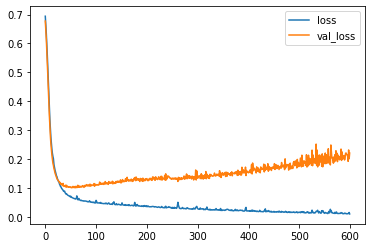

In [32]:
losses_df.plot()

In [33]:
model = Sequential()

model.add(Dense(30, activation="relu"))

model.add(Dense(15, activation="relu"))

#Binary Classification
model.add(Dense(1, activation= 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [34]:
from tensorflow.keras.callbacks import EarlyStopping

In [35]:
help(EarlyStopping)

Help on class EarlyStopping in module tensorflow.python.keras.callbacks:

class EarlyStopping(Callback)
 |  EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
 |  
 |  Stop training when a monitored quantity has stopped improving.
 |  
 |  Arguments:
 |      monitor: Quantity to be monitored.
 |      min_delta: Minimum change in the monitored quantity
 |          to qualify as an improvement, i.e. an absolute
 |          change of less than min_delta, will count as no
 |          improvement.
 |      patience: Number of epochs with no improvement
 |          after which training will be stopped.
 |      verbose: verbosity mode.
 |      mode: One of `{"auto", "min", "max"}`. In `min` mode,
 |          training will stop when the quantity
 |          monitored has stopped decreasing; in `max`
 |          mode it will stop when the quantity
 |          monitored has stopped increasing; in `auto`
 |          mode, t

In [36]:
early_stop = EarlyStopping(monitor= 'val_loss', mode = 'min', patience= 25, verbose=1)

In [37]:
model.fit(x= X_train, y = y_train, epochs = 600, validation_data = (X_test, y_test), callbacks = [early_stop])

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 1ms/sample - loss: 0.6769 - val_loss: 0.6558
Epoch 2/600
426/426 [==============================] - 0s 94us/sample - loss: 0.6293 - val_loss: 0.6124
Epoch 3/600
426/426 [==============================] - 0s 86us/sample - loss: 0.5850 - val_loss: 0.5709
Epoch 4/600
426/426 [==============================] - 0s 169us/sample - loss: 0.5433 - val_loss: 0.5285
Epoch 5/600
426/426 [==============================] - 0s 169us/sample - loss: 0.5021 - val_loss: 0.4846
Epoch 6/600
426/426 [==============================] - 0s 139us/sample - loss: 0.4588 - val_loss: 0.4404
Epoch 7/600
426/426 [==============================] - 0s 164us/sample - loss: 0.4167 - val_loss: 0.3976
Epoch 8/600
426/426 [==============================] - 0s 160us/sample - loss: 0.3759 - val_loss: 0.3576
Epoch 9/600
426/426 [==============================] - 0s 141us/sample - loss: 0.3443 - val_loss: 0.3245
Epoch 10/600


In [38]:
losses_df = pd.DataFrame(model.history.history)

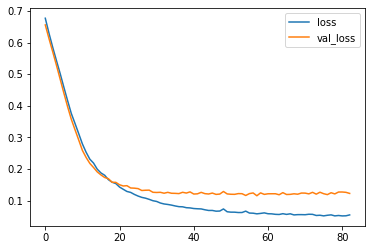

In [39]:
losses_df.plot()

In [40]:
model = Sequential()

model.add(Dense(30, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(15, activation="relu"))
model.add(Dropout(0.5))

#Binary Classification
model.add(Dense(1, activation= 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [41]:
model.fit(x= X_train, y = y_train, epochs = 600, validation_data = (X_test, y_test), callbacks = [early_stop])

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 1ms/sample - loss: 0.7127 - val_loss: 0.6826
Epoch 2/600
426/426 [==============================] - 0s 103us/sample - loss: 0.6883 - val_loss: 0.6626
Epoch 3/600
426/426 [==============================] - 0s 122us/sample - loss: 0.6785 - val_loss: 0.6435
Epoch 4/600
426/426 [==============================] - 0s 94us/sample - loss: 0.6581 - val_loss: 0.6247
Epoch 5/600
426/426 [==============================] - 0s 94us/sample - loss: 0.6302 - val_loss: 0.6003
Epoch 6/600
426/426 [==============================] - 0s 114us/sample - loss: 0.6201 - val_loss: 0.5730
Epoch 7/600
426/426 [==============================] - 0s 130us/sample - loss: 0.5981 - val_loss: 0.5458
Epoch 8/600
426/426 [==============================] - 0s 108us/sample - loss: 0.5843 - val_loss: 0.5219
Epoch 9/600
426/426 [==============================] - 0s 119us/sample - loss: 0.5787 - val_loss: 0.4998
Epoch 10/600


Epoch 78/600
426/426 [==============================] - 0s 113us/sample - loss: 0.1166 - val_loss: 0.0996
Epoch 79/600
426/426 [==============================] - 0s 104us/sample - loss: 0.1131 - val_loss: 0.0956
Epoch 80/600
426/426 [==============================] - 0s 113us/sample - loss: 0.1310 - val_loss: 0.0914
Epoch 81/600
426/426 [==============================] - 0s 103us/sample - loss: 0.1155 - val_loss: 0.0882
Epoch 82/600
426/426 [==============================] - 0s 112us/sample - loss: 0.1283 - val_loss: 0.1087
Epoch 83/600
426/426 [==============================] - 0s 113us/sample - loss: 0.1325 - val_loss: 0.0885
Epoch 84/600
426/426 [==============================] - 0s 113us/sample - loss: 0.1104 - val_loss: 0.1033
Epoch 85/600
426/426 [==============================] - 0s 121us/sample - loss: 0.1413 - val_loss: 0.1025
Epoch 86/600
426/426 [==============================] - 0s 115us/sample - loss: 0.1269 - val_loss: 0.0917
Epoch 87/600
426/426 [========================

In [42]:
model_loss = pd.DataFrame(model.history.history)

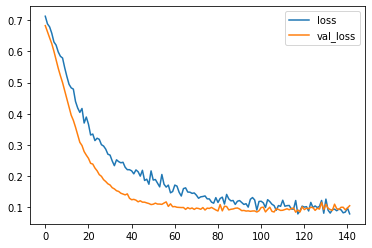

In [43]:
model_loss.plot()

In [45]:
pred = model.predict_classes(X_test)

In [46]:
from sklearn.metrics import confusion_matrix, classification_report

In [47]:
print(confusion_matrix(y_test, pred))

array([[54,  1],
       [ 4, 84]], dtype=int64)

In [48]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96        55
           1       0.99      0.95      0.97        88

    accuracy                           0.97       143
   macro avg       0.96      0.97      0.96       143
weighted avg       0.97      0.97      0.97       143

